In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction import text 

In [2]:
# import data

df = pd.read_csv('corpus_decade.csv')
df.head()

,Unnamed: 0,lyrics,label
0,1,too black too strong\ntoo black too strong\n\n...,1
1,2,flavor flav\ndon't\ndon't don't\ndon't don't\n...,1
2,3,i guarantee you no more music by the suckas\nn...,1
3,4,go go go go go go\ntake a look at his style\nt...,1
4,5,1 type verse\n\ntake that ha ha yeah boy\nbest...,1


In [3]:
# train test split

y = df['label']
x = df['lyrics']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state=14)

In [4]:
# Extracting features- CountVectorizer

count_vectorizer = CountVectorizer(stop_words = 'english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, Y_train)
pred = nb_classifier.predict(count_test)
print('accuracy:', metrics.accuracy_score(Y_test, pred))

accuracy: 0.7736389684813754


In [5]:
# Extracting features- tfidf

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)
tfidf_test = tfidf_vectorizer.transform(X_test.values)

nb_classifier_1 = MultinomialNB()
nb_classifier_1.fit(tfidf_train, Y_train)
pred_1 = nb_classifier_1.predict(tfidf_test)
print('accuracy:', metrics.accuracy_score(Y_test, pred_1))

/Users/litalert/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


accuracy: 0.5300859598853869


<div class="span5 alert alert-info">

<ul>
Extracting features with CountVectorizer out performed tfidf. Using the built in stop word list, we got model accuracy of 79%. Next, we're going to explore learning curve to see if getting more data would help improving the model

</ul>
</div>

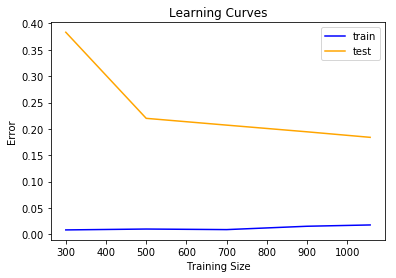

In [6]:
# Plotting learning curves 

# setting up data points
df_300 = df.sample(n=300)
df_500 = df.sample(n=500)
df_700 = df.sample(n=700)
df_900 = df.sample(n=900)

points = [df_300, df_500, df_700, df_900, df]
points_number = [300, 500, 700, 900, 1057]

# run multiple models using diffent training size
test = []
train = []

for i in points:
    y = i['label']
    x = i['lyrics']
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=14)
    count_vectorizer = CountVectorizer(stop_words = 'english')
    count_train = count_vectorizer.fit_transform(X_train.values)
    count_test = count_vectorizer.transform(X_test.values)

    nb_classifier = MultinomialNB()
    nb_classifier.fit(count_train, Y_train)
    pred = nb_classifier.predict(count_test)
    pred_ = nb_classifier.predict(count_train)
    test_acc = metrics.accuracy_score(Y_test, pred)
    train_acc = metrics.accuracy_score(Y_train, pred_)
    
    test.append(test_acc)
    train.append(train_acc)

# calculating test/train errors
test_err = []
train_err = []
for i in test:
    err = 1-i
    test_err.append(err)
for i in train:
    err = 1-i
    train_err.append(err)
    
# generating graph
plt.plot(points_number, train_err, color='blue', label='train')
plt.plot(points_number, test_err, color='orange', label='test')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.legend()
plt.show()

<div class="span5 alert alert-info">

<ul>
From the plot, it looks like the test error will keep going down as training size increases. In theory, the two plot could get closer, but never cross. Extrapolating the plot, I'm convinced that the test error will decrease if we get more data. Next, we'll build a model with more data and evaluate the results.

</ul>
</div>

In [7]:
# building model with more data and perform parameter tuning

# import data
df2 = pd.read_csv('corpus_decade_2.csv')
df2 = pd.concat([df, df2], axis=0)

# train test split
y = df2['label']
x = df2['lyrics']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=14)

# token count
count_vectorizer = CountVectorizer(stop_words = 'english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 0.5]
for i in alphas:
    nb_classifier = MultinomialNB(alpha = i)
    nb_classifier.fit(count_train, Y_train)
    pred = nb_classifier.predict(count_test)
    print('accuracy ( alpha =', i, '):', metrics.accuracy_score(Y_test, pred))

accuracy ( alpha = 0.001 ): 0.7409638554216867
accuracy ( alpha = 0.01 ): 0.7650602409638554
accuracy ( alpha = 0.1 ): 0.7740963855421686
accuracy ( alpha = 1 ): 0.7891566265060241
accuracy ( alpha = 10 ): 0.5210843373493976
accuracy ( alpha = 100 ): 0.39156626506024095
accuracy ( alpha = 1000 ): 0.3885542168674699
accuracy ( alpha = 0.5 ): 0.7951807228915663


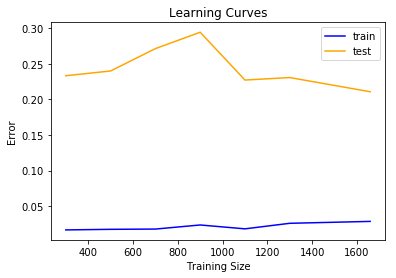

In [8]:
# Plotting learning curves 

df_300 = df2.sample(n=300)
df_500 = df2.sample(n=500)
df_700 = df2.sample(n=700)
df_900 = df2.sample(n=900)
df_1100 = df2.sample(n=1100)
df_1300 = df2.sample(n=1300)

points = [df_300, df_500, df_700, df_900, df_1100, df_1300, df2]
points_number = [300, 500, 700, 900, 1100, 1300, 1659]

test = []
train = []

for i in points:
    y = i['label']
    x = i['lyrics']
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=14)
    count_vectorizer = CountVectorizer(stop_words = 'english')
    count_train = count_vectorizer.fit_transform(X_train.values)
    count_test = count_vectorizer.transform(X_test.values)

    nb_classifier = MultinomialNB()
    nb_classifier.fit(count_train, Y_train)
    pred = nb_classifier.predict(count_test)
    pred_ = nb_classifier.predict(count_train)
    test_acc = metrics.accuracy_score(Y_test, pred)
    train_acc = metrics.accuracy_score(Y_train, pred_)
    
    test.append(test_acc)
    train.append(train_acc)

test_err = []
train_err = []
for i in test:
    err = 1-i
    test_err.append(err)
for i in train:
    err = 1-i
    train_err.append(err)
    
plt.plot(points_number, train_err, color='blue', label='train')
plt.plot(points_number, test_err, color='orange', label='test')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.legend()
plt.show()

<div class="span5 alert alert-info">

<ul>
Using more data and tuning the alpha value improved the model by 2%. At this point, I decided not to get anymore data as we can see that the test set learning curve flatten out. I don't expect significant improvment on the model as we spend more time collecting more data. Next, we're going to look at the matrics and feature coefficient in order to identify ways to further improve the model. 

</ul>
</div>

In [9]:
# confusion matrix

print('Confusion Matrix:')
print(confusion_matrix(Y_test, pred))

Confusion Matrix:
[[ 60  13   7]
 [  8 106  14]
 [  4  24  96]]


In [10]:
# print features with the highest coefficient values

def print_top20(vectorizer, clf, class_labels):
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top20 = np.argsort(clf.coef_[i])[-20:]
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top20)))

print_top20(count_vectorizer, nb_classifier, ['80s', '90s', '2000+'])

80s: em beat rock ain mc make let come said say yo time man just know ll got don cause like
90s: niggaz yeah black come make let time ya nigga ll ain shit man yo just know cause don got like
2000+: say let come make life ll yo fuck yeah love man cause nigga shit ain just got know don like


<div class="span5 alert alert-info">

<ul>
The list above are the features with the highest coefficent values from each class. As we can see, the built-in stop words list doesn't cover unusual "stop words" found in hip-hop song lyrics. Next, I'm going add additional words to the built-in stop words list with the hope to improve the model performance. Based on the confusion matrix above, we can see that most misclassifications happen between classes 2 and 3 (90s and 2000+). So, the selected features are the ones that appear in all class or appear in both classes 2 and 3. 

</ul>
</div>

In [11]:
# optimized model

# adding more words to stop_words list
more_words = ['like', 'cause', 'don', 'got', 'just', 'know', 'man', 'ain', 'yo', 'say', 'll', 'time', 'let', 'make', 'life', 'right', 'nigga']
stop_words_ = text.ENGLISH_STOP_WORDS.union(more_words)

y = df['label']
x = df['lyrics']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=14)
count_vectorizer = CountVectorizer(stop_words = stop_words_)
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
nb_classifier = MultinomialNB(alpha = 0.5)
nb_classifier.fit(count_train, Y_train)
pred = nb_classifier.predict(count_test)
print('accuracy:', metrics.accuracy_score(Y_test, pred))

accuracy: 0.8160377358490566


In [12]:
# classification report

print('\n')
print('Classification Repart:')
print(classification_report(Y_test, pred))



Classification Repart:
             precision    recall  f1-score   support

          1       0.87      0.85      0.86        53
          2       0.78      0.84      0.81        82
          3       0.83      0.77      0.80        77

avg / total       0.82      0.82      0.82       212

